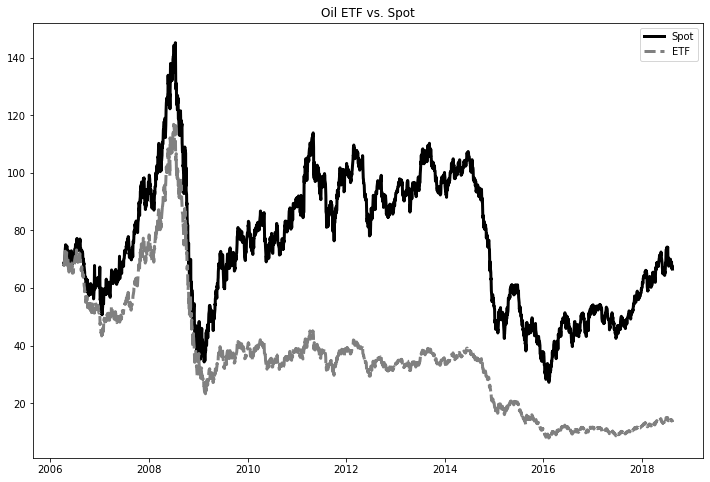

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from csv
df = pd.read_csv('Trading Evolved/Chapter 9 - ETF/oil_etf_vs_spot.csv',
                 index_col = 'Date', parse_dates = ['Date'])

# Make new figure and set the size
fig = plt.figure(figsize = (12, 8))

# The first subplot, planning for 1 plot1 high, 1 plot wide, this being the first
ax = fig.add_subplot(111)
ax.set_title('Oil ETF vs. Spot')
ax.plot(df['WTI-West-Texas-Intermediate'], linestyle = '-',
        label = 'Spot', linewidth = 3.0, color = 'black')
ax.plot(df['USO'], linestyle = '--', label = 'ETF', linewidth = 3.0, color = 'grey')
ax.legend()

## Inverse ETF

In [2]:
df = pd.DataFrame(index = range(50))

In [3]:
# Set odd days to +3%
df.loc[df.index%2 == 1, 'underlying_return'] = 0.03

# Set even days to -2.913%
df.loc[df.index%2 == 0, 'underlying_return'] = -0.02913

In [4]:
# Calculate cumulative series
df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

In [5]:
# Inverse ETF
df['short_return'] = df['underlying_return'] * -1
df['short_price'] = (df['short_return'] + 1).cumprod()

# Double Inverse ETF
df['double_short_return'] = df['underlying_return'] * -2
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()

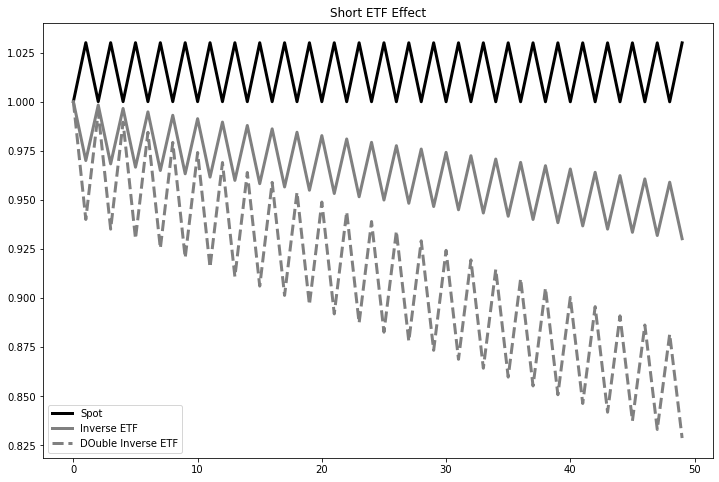

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(index = range(50))

# Set odd days to +3%
df.loc[df.index%2 == 1, 'underlying_return'] = 0.03

# Set evendays to -2.913%
df.loc[df.index%2 == 0, 'underlying_return'] = -0.02913

# Start at zero
df.iloc[0].loc['underlying_return'] = 0

# Calculate cumulative series
df['underlying_price'] = (df['underlying_return'] + 1).cumprod()

# Inverse ETF
df['short_return'] = df['underlying_return'] * -1
df['short_price'] = (df['short_return'] + 1).cumprod()

# Double Inverse ETF
df['double_short_return'] = df['underlying_return'] * -2
df['double_short_price'] = (df['double_short_return'] + 1).cumprod()

# Make a new figure and set the size
fig = plt.figure(figsize = (12, 8))

# The first subplot, planning for 1 plot high, 1 plot wide, this being the first
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['underlying_price'], linestyle = '-', label = 'Spot', linewidth = 3.0, color = 'black')
ax.plot(df['short_price'], linestyle = '-', label = 'Inverse ETF', linewidth = 3.0, color = 'grey')
ax.plot(df['double_short_price'], linestyle = '--', label = 'DOuble Inverse ETF', linewidth = 3.0, color = 'grey')
ax.legend()

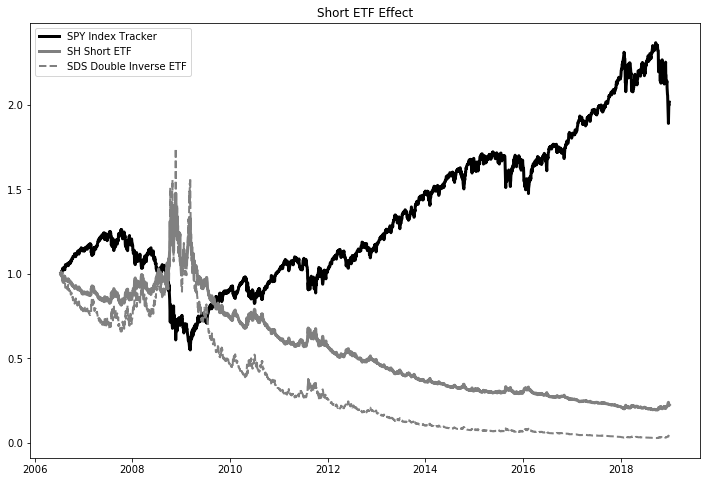

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Function for recalculating series with a common base
def rebased(ts):
    return ts / ts[0]

# Read data from csv
df = pd.read_csv('Trading Evolved/Chapter 9 - ETF/short_etfs.csv', index_col = 'Date', parse_dates = ['Date'])

# Calculate all series starting from first value
df = df.apply(rebased)

# Make new figure and set the size
fig = plt.figure(figsize = (12, 8))

# The first subplot, planning for 1 plot high, 1 plot wide, this being the first
ax = fig.add_subplot(111)
ax.set_title('Short ETF Effect')
ax.plot(df['SPY'], linestyle = '-', label = 'SPY Index Tracker', linewidth = 3.0, color = 'black')
ax.plot(df['SH'], linestyle = '-', label = 'SH Short ETF', linewidth = 3.0, color = 'grey')
ax.plot(df['SDS'], linestyle = '--', label = 'SDS Double Inverse ETF', linewidth = 2.0, color = 'grey')
ax.legend()